# Описание проекта

## Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

### Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.


* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: 
* выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.


### «Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.


## Содержание
* [Шаг 1. Откройте файл с данными и изучите общую информацию](#1)
* [Шаг 2. Подготовьте данные](#2)
* [Шаг 3. Проведите исследовательский анализ данных (EDA)](#3)
* [Шаг 4. Постройте модель прогнозирования оттока клиентов](#4)
* [Шаг 5. Сделайте кластеризацию клиентов](#5)
* [Шаг 5. Изучите результаты эксперимента](#6)


In [1]:
!pip install sklearn # Установка библиотеки.

### Откройте файл с данными и изучите общую информацию
<a class="anchor" id="1"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

In [3]:
data=pd.read_csv('gym_churn.csv')

In [4]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Исправим столбцы (названия). 

In [6]:
data.columns = data.columns.str.lower()


### Оценим сет.
<a class="anchor" id="2"></a>

In [7]:
def series_analise(series):
    print('--------------------------------------------------------------------------------------------------')
    print('Имя столбца',series.name)
    print('Тип данных',series.dtypes)
    try: 
        return f"Для этого столбца Среднеее значение:{series.mean()}" + "\n" + f"Максимальное значение: {series.max()}"+ "\n" + f"Минимальное значение: {series.min()}"+ "\n" + f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"
    except:
        return f"Для этого столбца" + "\n" f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"

In [8]:
for i in data.columns:
    print(series_analise(data[i]))

--------------------------------------------------------------------------------------------------
Имя столбца gender
Тип данных int64
Для этого столбца Среднеее значение:0.51025
Максимальное значение: 1
Минимальное значение: 0
Всего наблюдений: 4000
Уникальные значения: [1 0]
--------------------------------------------------------------------------------------------------
Имя столбца near_location
Тип данных int64
Для этого столбца Среднеее значение:0.84525
Максимальное значение: 1
Минимальное значение: 0
Всего наблюдений: 4000
Уникальные значения: [1 0]
--------------------------------------------------------------------------------------------------
Имя столбца partner
Тип данных int64
Для этого столбца Среднеее значение:0.48675
Максимальное значение: 1
Минимальное значение: 0
Всего наблюдений: 4000
Уникальные значения: [1 0]
--------------------------------------------------------------------------------------------------
Имя столбца promo_friends
Тип данных int64
Для этого столбц

### Проверим дубликаты.


In [9]:
data.duplicated().sum()

0

### Проверим пропуски.

In [10]:
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

#### Похоже данные готовы для анализа из коробки. :)

## Исследовательский анализ данных (EDA)
<a class="anchor" id="3"></a>

#### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());


In [11]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [12]:
data_churn=data.groupby('churn').mean().transpose()
data_churn

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


#### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [13]:
data_churn.columns=['остались', 'ушли']

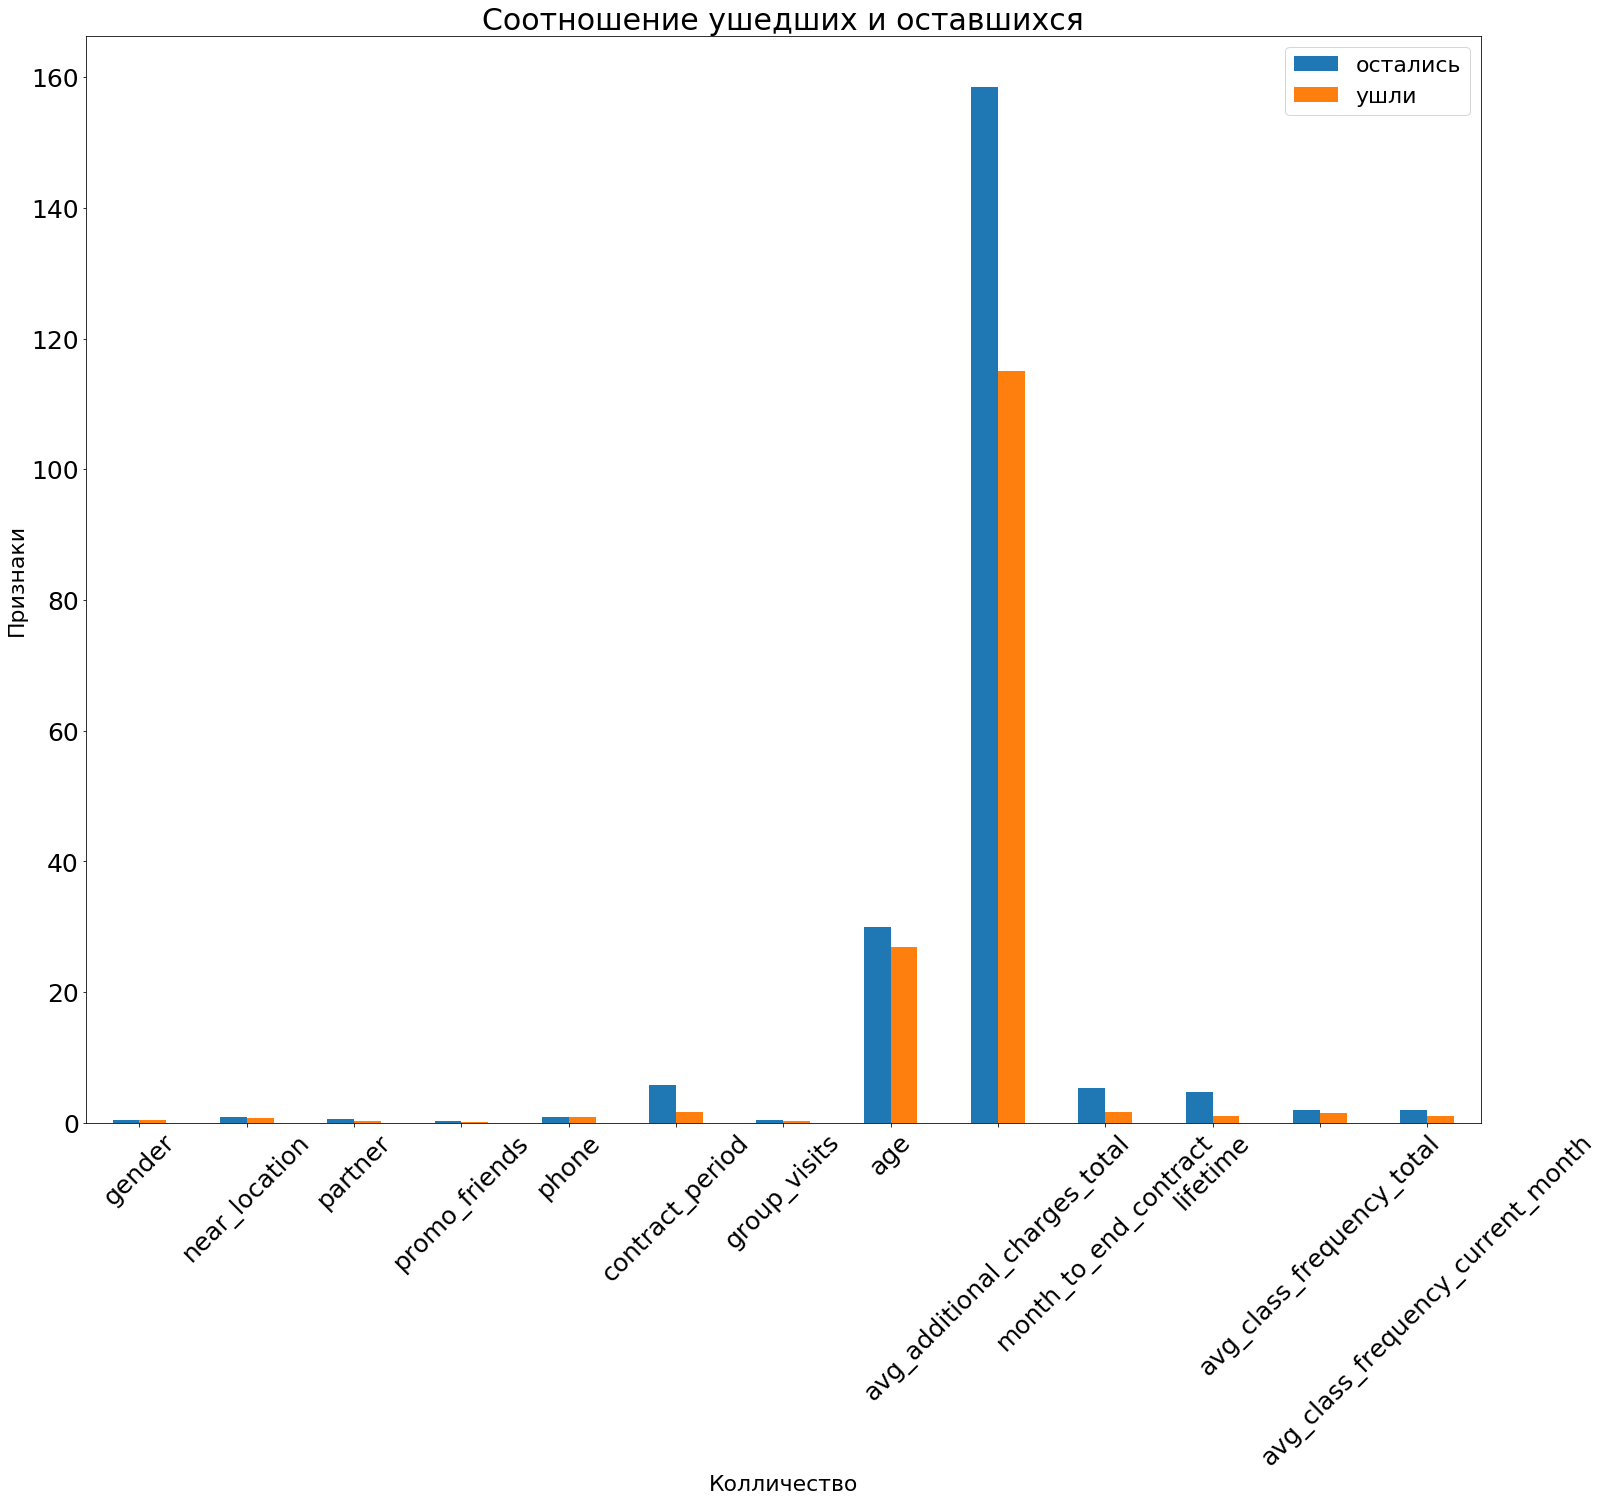

In [14]:
data_churn.plot(kind= 'bar', figsize = (25,20),fontsize=25)
plt.rc('legend', fontsize=22)
plt.title('Соотношение ушедших и оставшихся',fontsize=30)
plt.xlabel('Колличество',fontsize=22)
plt.ylabel('Признаки',fontsize=22)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div class="alert alert-info">
    <b>Комментарий студента  РЕВЬЮ 1:</b> Построю графики попарно? для каждого признака ушедших и оставшихся.
</div>

/home/gennalll/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


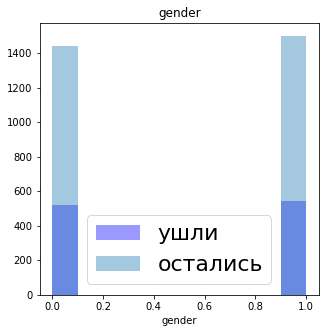

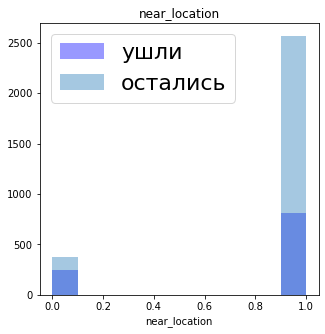

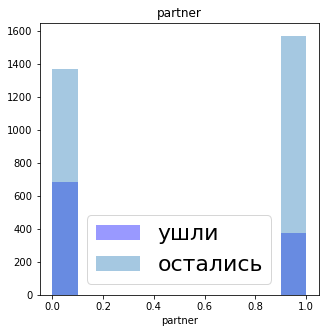

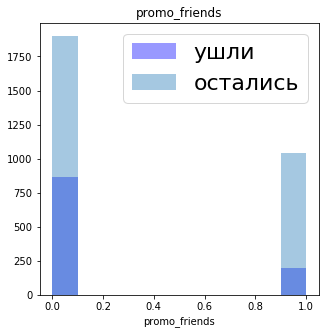

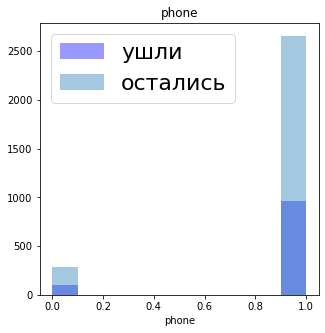

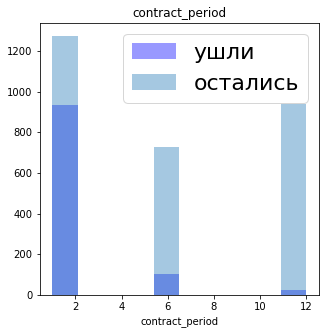

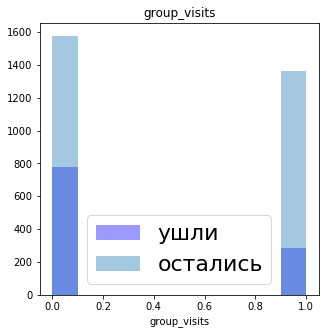

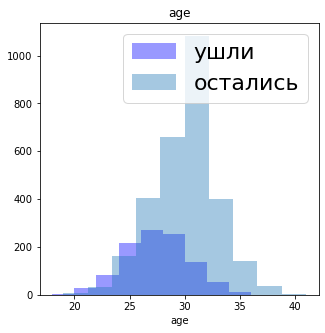

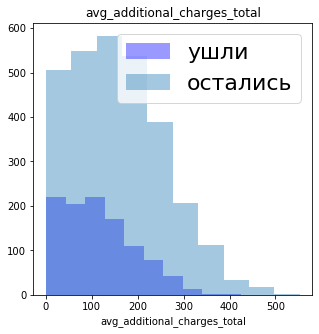

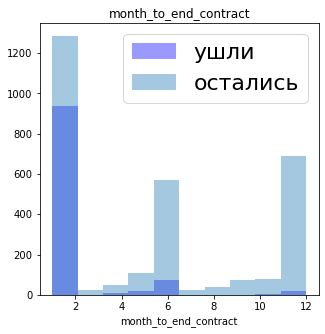

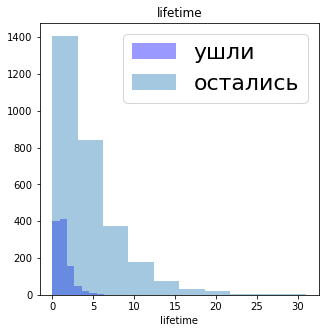

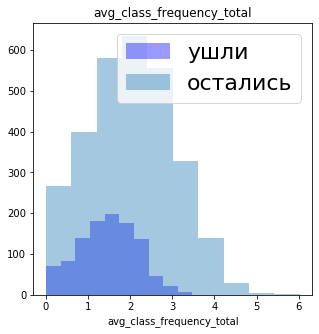

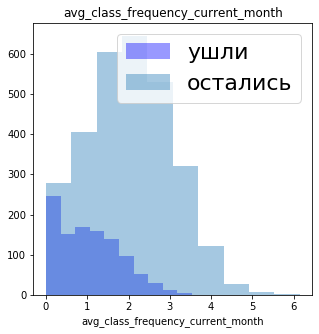

In [15]:
for column in data.drop('churn', axis = 1).columns:
    plt.figure(figsize=(5, 5))
    data.groupby('churn')[column]
    sns.distplot(data.query('churn == 1')[column], bins=10, kde=False, color='b', label='ушли')
    sns.distplot(data.query('churn == 0')[column], bins=10, kde=False, label='остались')
    plt.legend()
    plt.title(column)
    plt.show()

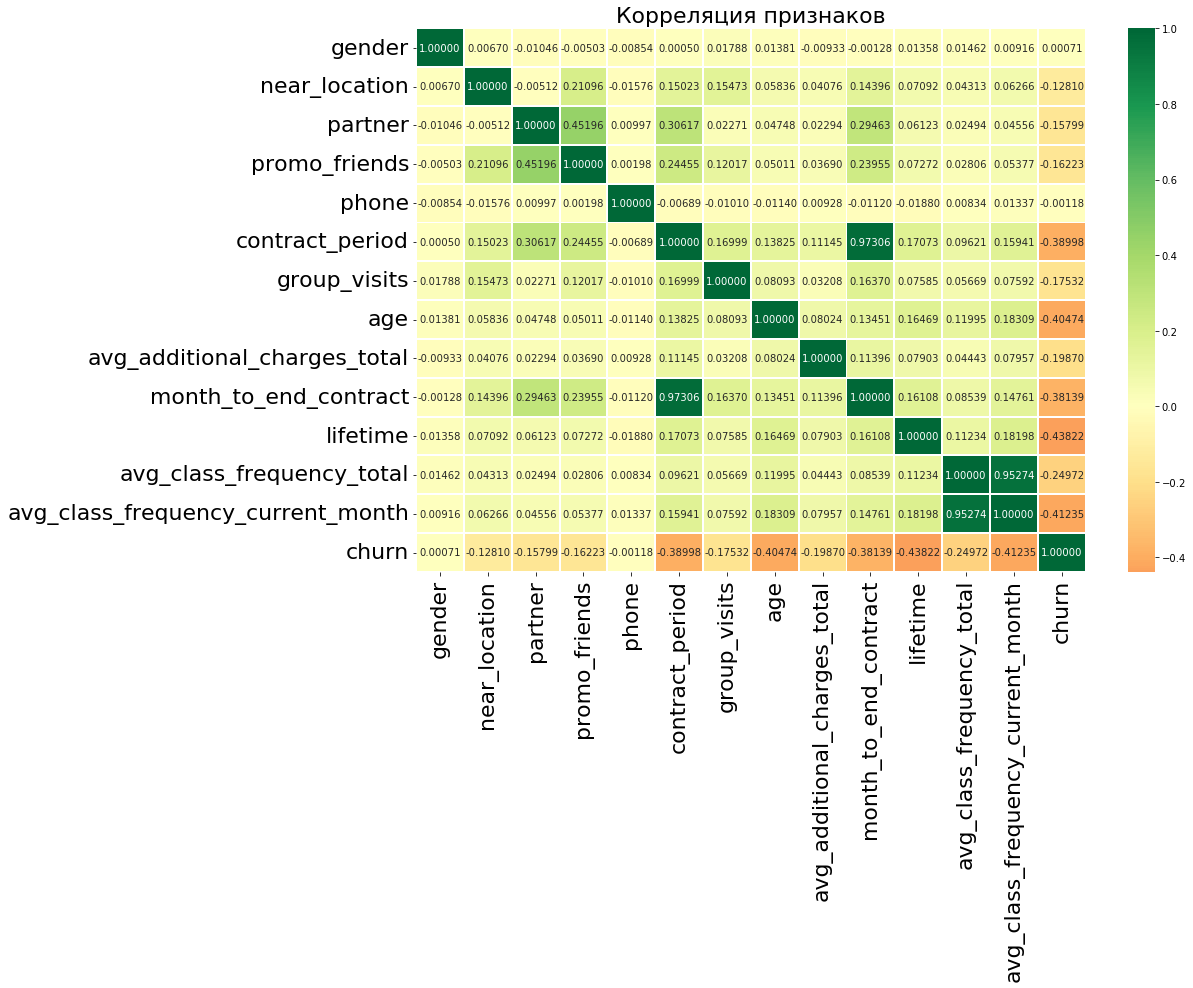

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True,fmt = '0.05f', linewidths=.9,)

plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

### Вывод:
#### Посетители.
* Пол не влияет на посещение.
* Большинство посетителей живет или работает рядом с залом.
* Почти половина посетителей  сотрудник компании-партнёра клуба.
* Групповые занятия у 41% посетителей.
* Средний возраст клиентов 29 лет.
#### Кто склонен продолжать посещать зал.
* Живет рядом.
* Сотрудник компании-партнера.
* Занимаеться с друзьями и или групповые занятия.
* Более старший.
* Давно ходит в клуб.
* Два или боле раз в неделю ходит в клуб.
* Тратит много на доп услуги.


## Постройте модель прогнозирования оттока клиентов
<a class="anchor" id="4"></a>

#### Готовим данные. Разбейте данные на обучающую и валидационную выборку функцией train_test_split()

In [17]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn', axis = 1)
y = data['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# зададим алгоритм для нашей модели
model = model = LogisticRegression() 

# обучим модель
model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

/home/gennalll/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Функция для отпечатывания метрик.
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#### Оценим метрики accuracy, precision и recall  для LogisticRegression.

In [19]:
print_all_metrics(
    y_test,
    predictions,
    probabilities,
    title='Метрики для модели логистической регрессии:',
)


Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.80
	F1: 0.80
	ROC_AUC: 0.96


In [20]:
# обучиим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [21]:
rf_model =  RandomForestClassifier(n_estimators = 100,random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

In [22]:
print_all_metrics(
   y_test, 
   rf_predictions,
   rf_probabilities,
   title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


### Вывод обе модели показывают хорошие результаты. Случайного лес предпочтительнее.

## Сделайте кластеризацию клиентов
<a class="anchor" id="5"></a>

#### Стандартизируем  данные. Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

In [23]:
x_sc = scaler.fit_transform(data.drop(['churn'], axis=1))
df_columns = data.drop(['churn'], axis=1).columns
x_sс = pd.DataFrame(x_sc, columns = df_columns).astype('float64')
linked = linkage(x_sс, method = 'ward')


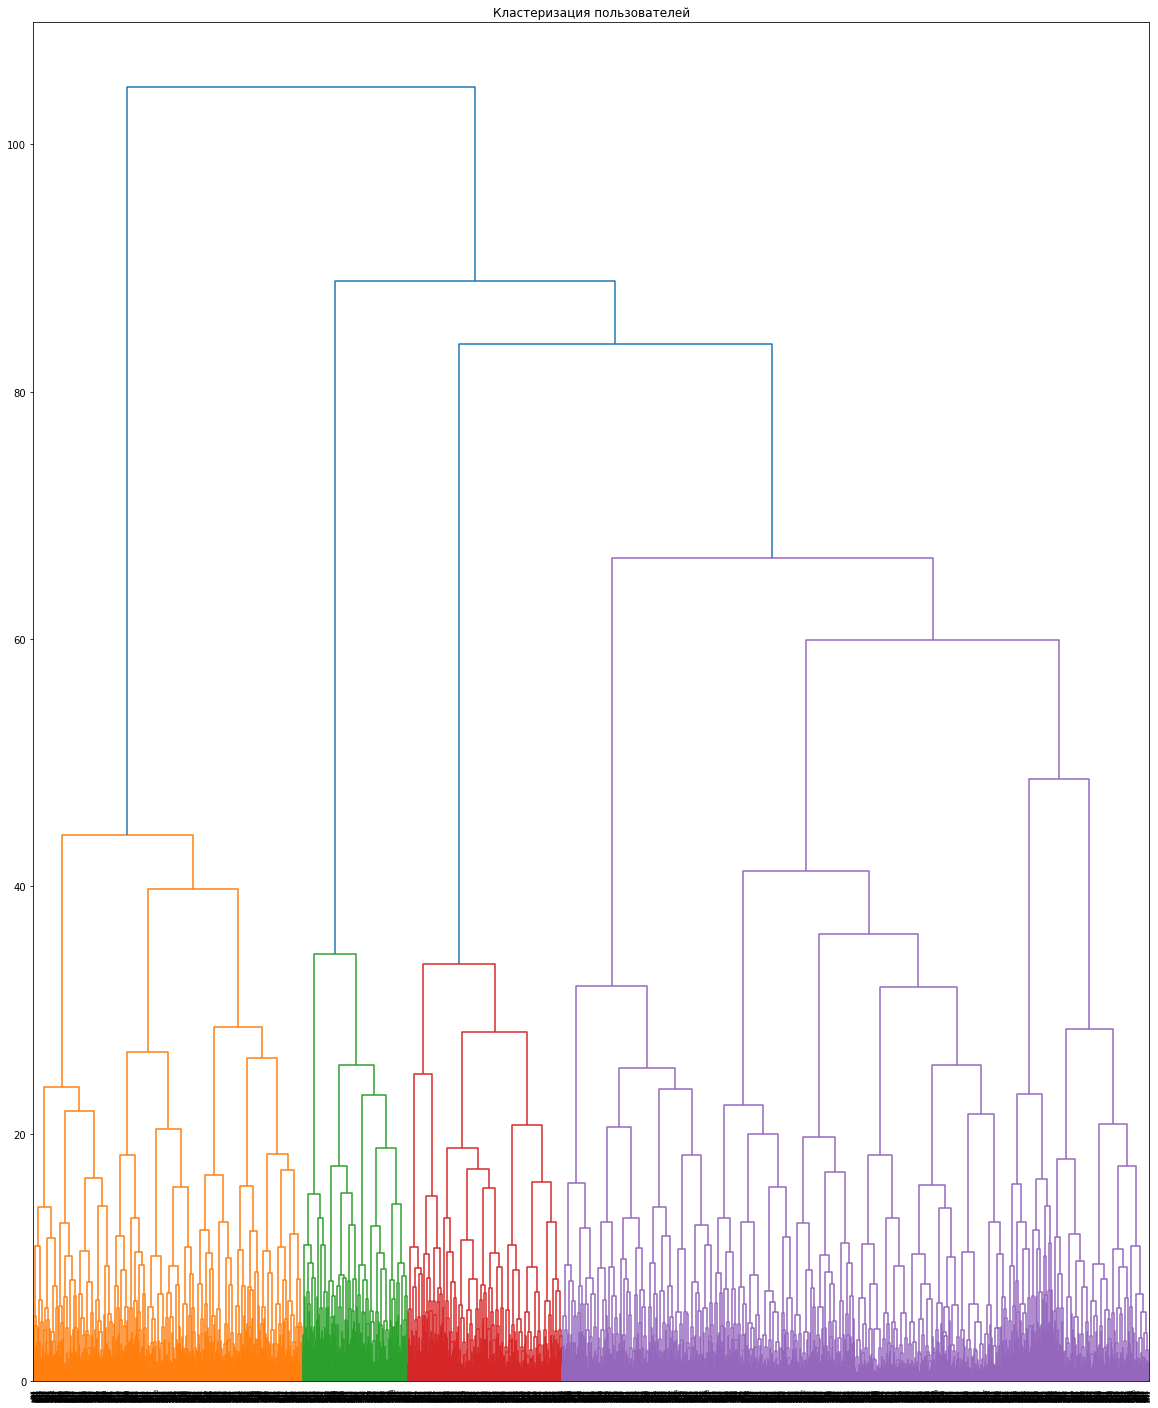

In [24]:
plt.figure(figsize=(20, 25))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

#### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 

In [25]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(x_sc)
data['cluster'] = labels

In [26]:
data.groupby('cluster').mean().transpose()

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


### Распределение людей по кластерам.

In [27]:
data['cluster'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

### Для каждого полученного кластера посчитаем долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [28]:
data.groupby('cluster')['churn'].mean().sort_values().transpose()

cluster
0    0.027723
4    0.068019
1    0.267532
2    0.443564
3    0.514263
Name: churn, dtype: float64

#### Вывод.
* Из наших 5 кластеров 2 склонных к уходу.(2,3)
* И 2 вероятно продолжат заниматься(0,4).
* 1 класс вероятность уйти меньше чем 2 и 3 примерно в два раза.
* Результаты корелируют с исследовательским анализом.

##### 2 и 3й классы:
     * Реже ходят раз в неделю.
     * реже занимаються в группе.
     * Реже партнеры и приведенные друзья.
     * Меньше тратят на услуги.

##### 0 и 4й классы самые стойкие:
     * жители района.
     * компаний-партнеров
     * занимаются с друзьями или в группе.
     * Много потребляют доп услуг.
     * Часто посещают занятия.

### Считал важность признаков на основании модели,случайного леса.

In [29]:
importances = rf_model.feature_importances_
a=pd.DataFrame(X.columns, importances).reset_index()
a.columns=['value','index']
print(a.sort_values(by='value',ascending = False))


       value                              index
10  0.276499                           lifetime
12  0.180170  avg_class_frequency_current_month
11  0.129883          avg_class_frequency_total
7   0.119129                                age
8   0.091473       avg_additional_charges_total
9   0.068855              month_to_end_contract
5   0.065964                    contract_period
6   0.015652                       group_visits
0   0.012425                             gender
2   0.012285                            partner
3   0.012053                      promo_friends
1   0.009421                      near_location
4   0.006192                              phone


### Постройте распределения признаков для кластеров.

In [30]:
# Функция для отристовки признаков кластеров.
def graf_cluster(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.countplot(x = data[column], hue='cluster', data=data)
        plt.title(column)
        plt.show()


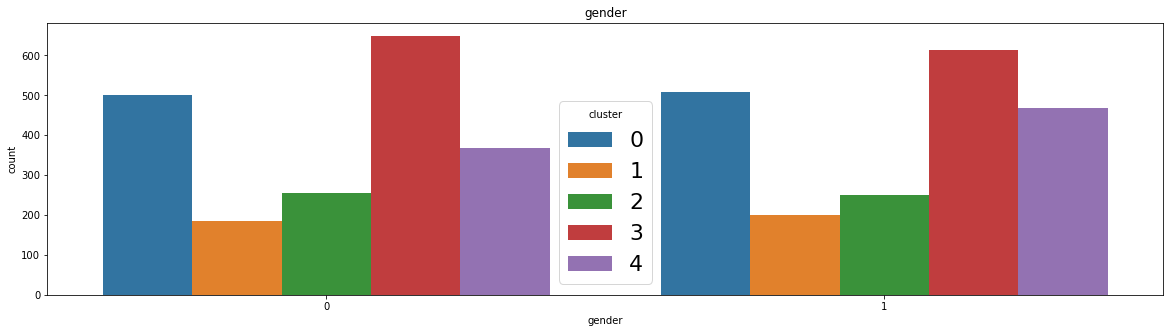

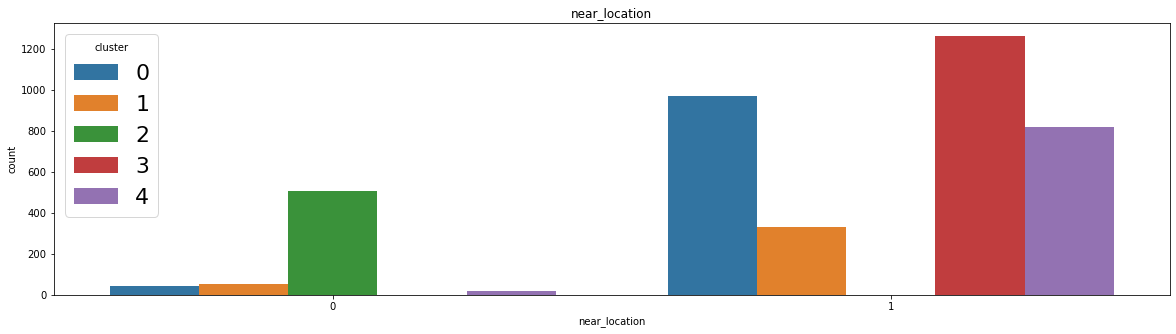

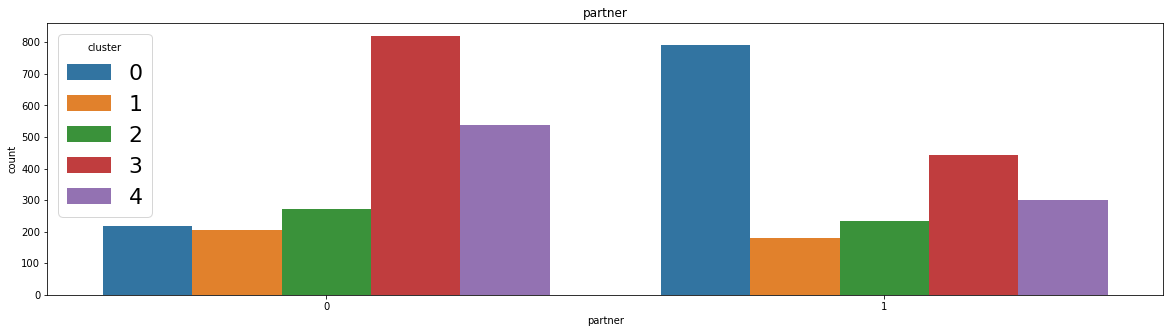

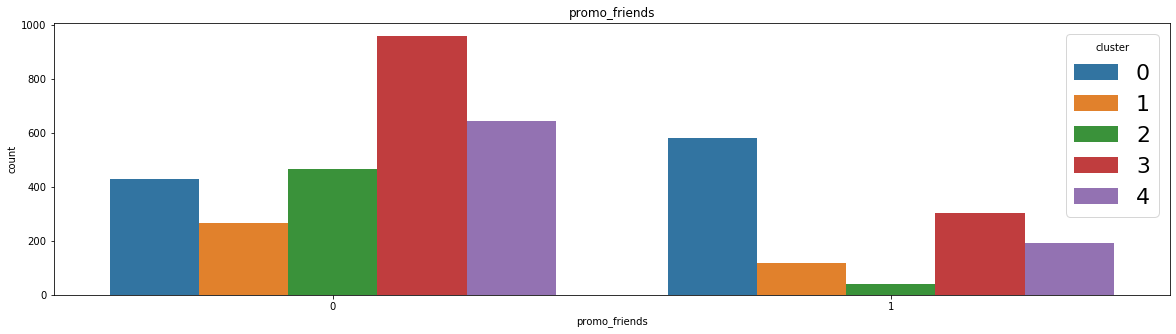

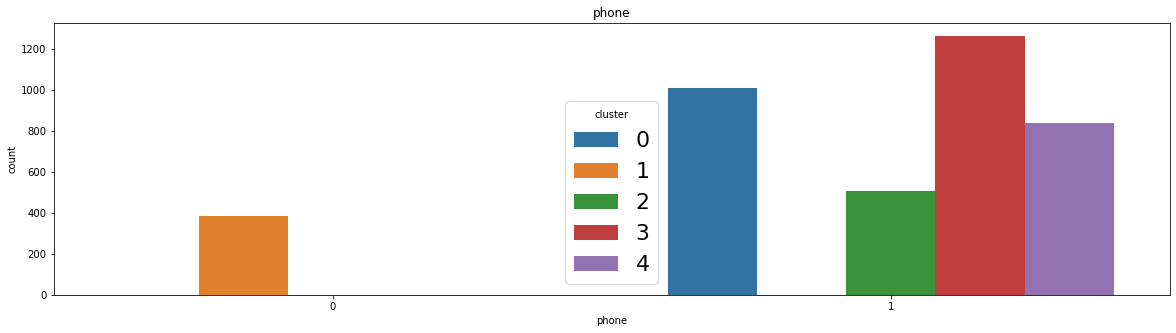

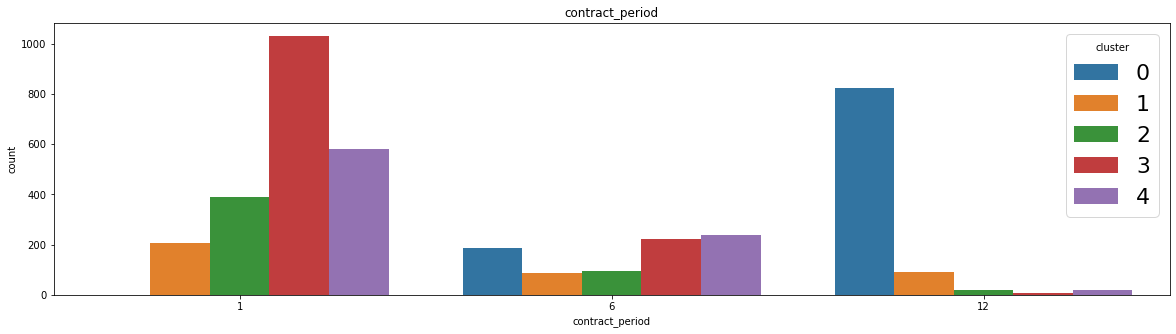

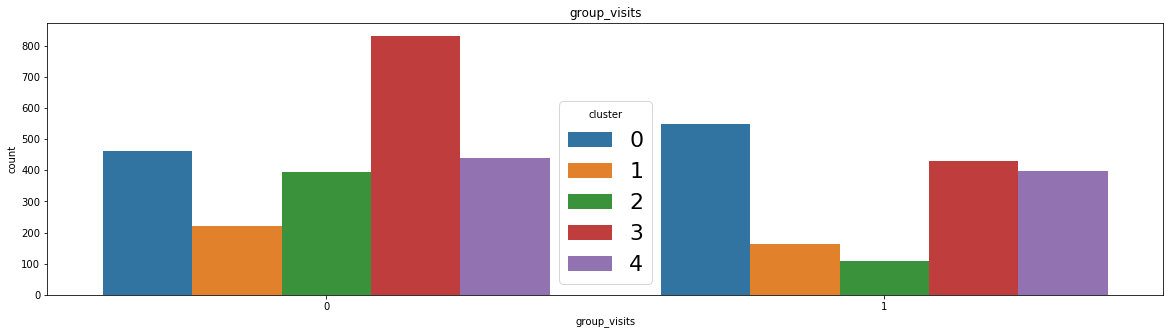

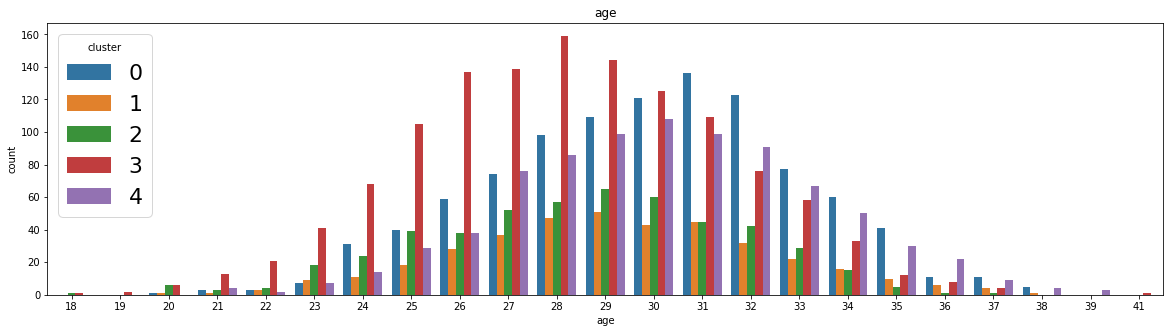

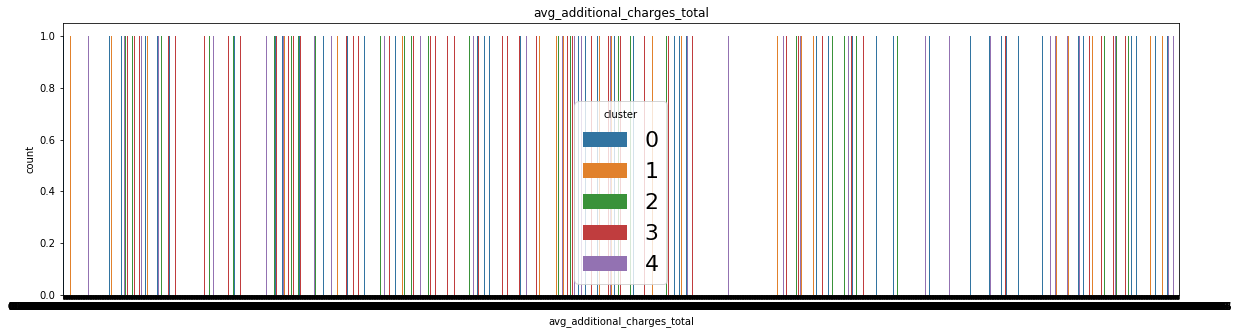

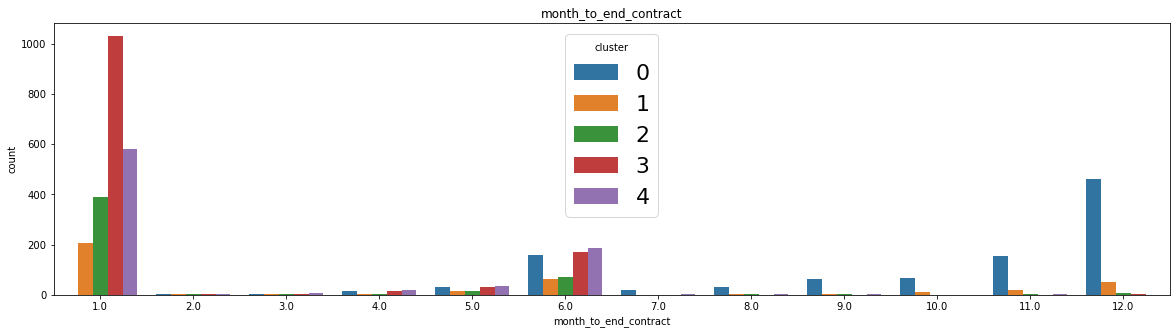

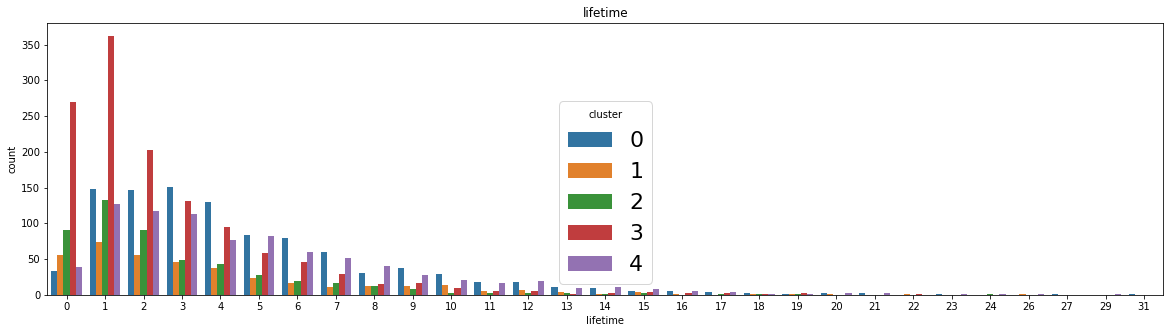

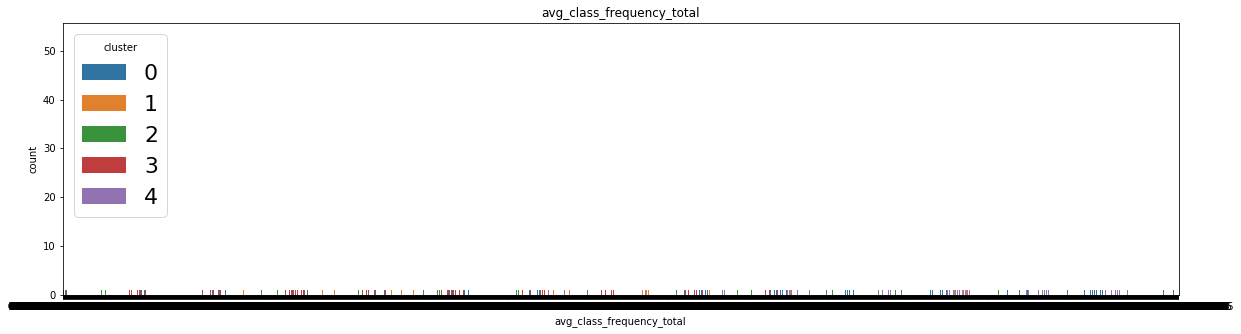

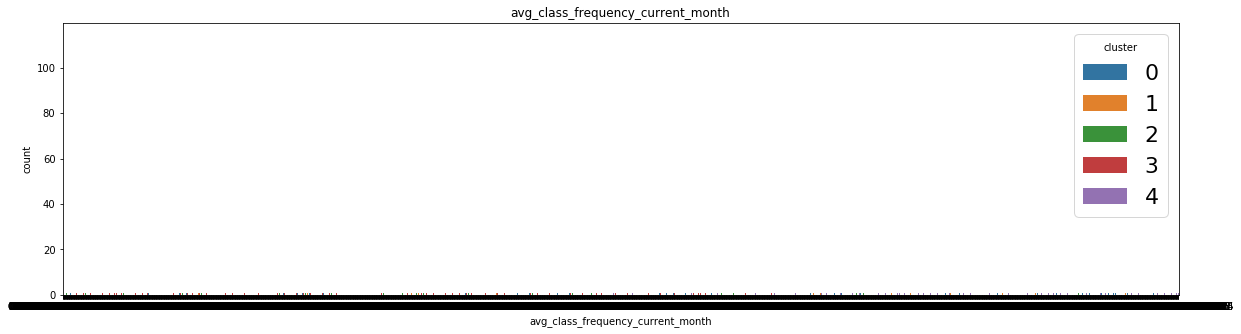

In [31]:
graf_cluster(X.columns)

In [32]:
#Функция для отрисовки числовых графиков.
def graf_cluster_float(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.histplot(x = data[column], hue='cluster', data=data,palette='twilight_shifted_r')
        plt.title(f'Признак - {column}')
        plt.ylabel("Посетители")
        plt.show()


In [33]:
list_columns_float=['age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']

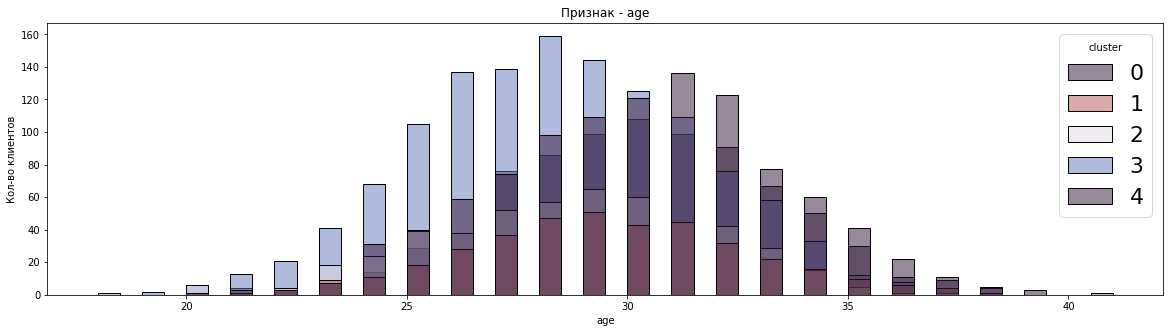

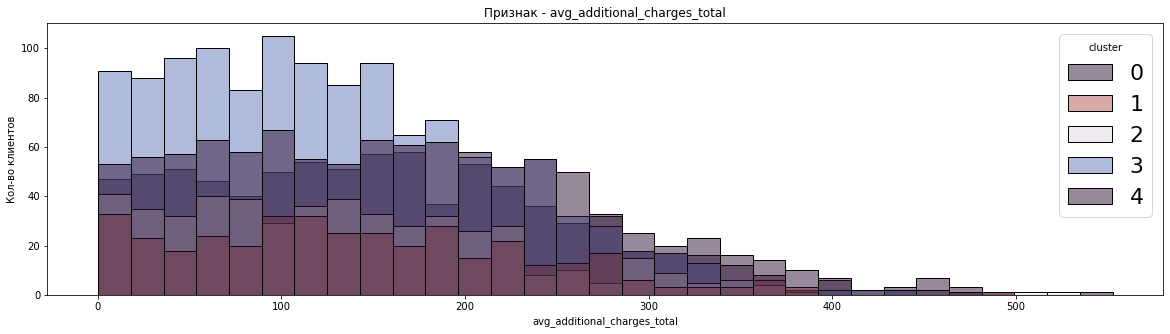

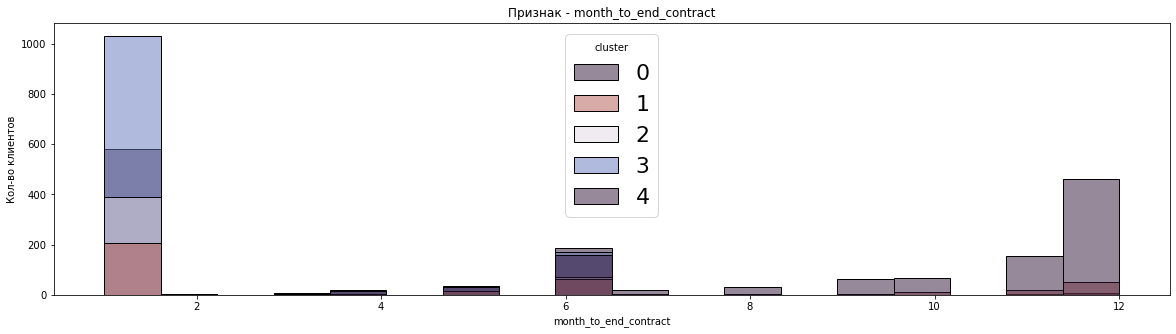

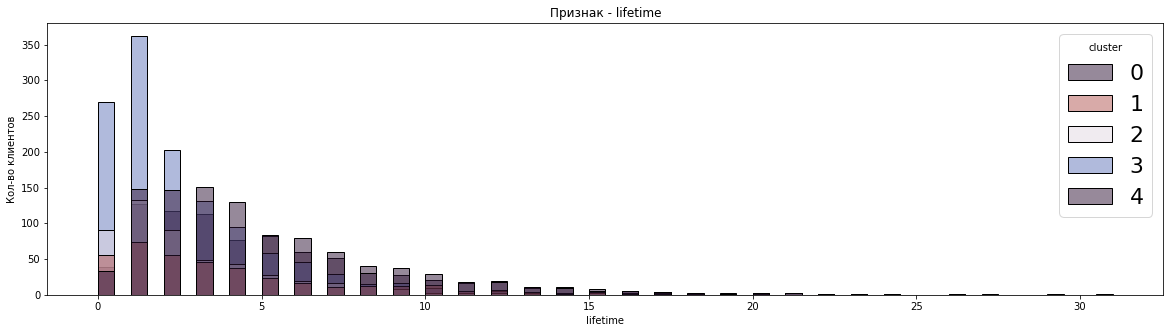

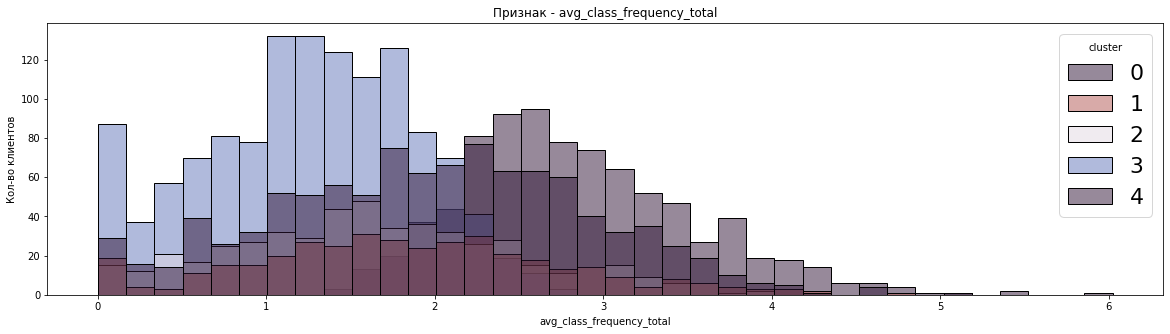

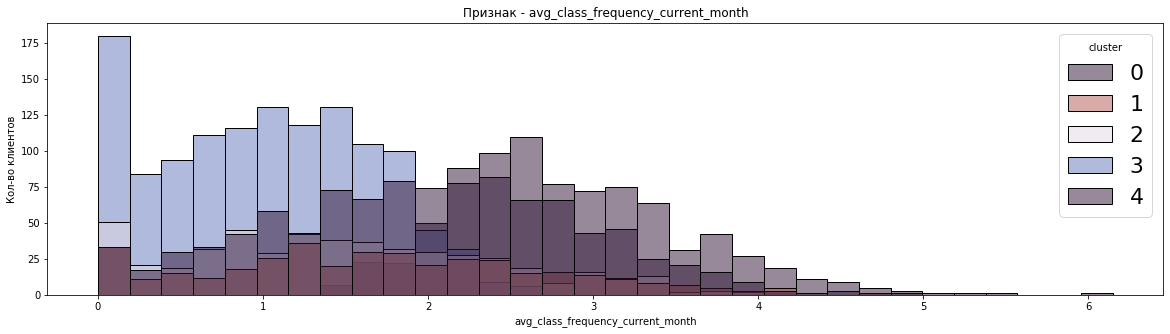

In [34]:
graf_cluster_float(list_columns_float)

## Общий вывод и рекомендации. 
<a class="anchor" id="6"></a>

#### Проведя исследовательский анализ датасета ML анализ, пришли к следующим выводам.

##### Прогназировать отток клиентов по имеющимся данным возможно. С высокой точностью с этой задачей спраляеться как логистическая регрессия так и случайный лес c небольшим приимуществом.

##### Выявили факторы которые влияют на устойчивое посещение:
* жители района.
* Сотрудники компаний-партнеров
* занимаются с друзьями или в группе.
* Много потребляют доп услуг.
* Часто посещают занятия.
##### После кластеризации выявили 5 классов посетителй:

    Из наших 5 кластеров 2 склонных к уходу.(2,3)
    И 2 вероятно продолжат заниматься(0,4).
    1 класс вероятность уйти меньше чем 2 и 3 примерно в два раза.
    Результаты корелируют с исследовательским анализом.
    
    
## Рекомендации:

* Необходимо привлекать людей живущих не подалеку.(Реклама на определенной территории)
* Продолжить и улучшить сотрудничество с компаниями партнерами.
* Стимулировать групповые занятия, привлекать друзей клиентов, организовывать групповые занятия для одиноких клиентов.
* Продолжить предлагать доп услуги, в большем объеме.
